In [3]:
# Question 1 Importing the packages
import sklearn as preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import confusion_matrix


In [4]:
#Importing package for datasets
from sklearn.datasets import load_digits

In [5]:
digit = load_digits()
x = digit.data
y = digit.target

In [6]:
x.shape , y.shape

((1797L, 64L), (1797L,))

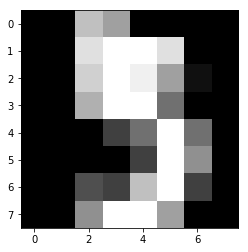

In [12]:
# Question 2
plt.imshow(x[5].reshape(8,8),cmap=plt.cm.gray)

In [14]:
#Question 3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [15]:
#Question 4
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#Question 5(a)classification accuracy means no. of cross predictions made as a ratio of all predictions made.
pred = reg.predict(x_test)

In [17]:
results = pd.DataFrame({"Predicted":pred,"Actual":y_test})
results

,Actual,Predicted
0,9,5
1,9,9
2,9,9
3,1,1
4,2,2
5,8,8
6,5,5
7,1,1
8,0,0
9,6,6


In [19]:
kfold = model_selection.KFold(n_splits=10,random_state=8)

In [21]:
results = model_selection.cross_val_score(reg,x,y,cv=kfold,scoring="accuracy")
results

array([0.90555556, 0.95      , 0.89444444, 0.91666667, 0.94444444,
       0.97222222, 0.97777778, 0.95530726, 0.8603352 , 0.93854749])

In [22]:
results.sum()/10

0.931530105524519

In [23]:
#Question 5(b)Logarithmic loss means performance metrics for evaluating the predictions of probabilities of membership to a given class. 
results = model_selection.cross_val_score(reg,x,y,cv=kfold,scoring="neg_log_loss")
results

array([-0.45778991, -0.14434019, -0.61739005, -0.27333073, -0.27594791,
       -0.12824496, -0.11027347, -0.12335714, -0.62604368, -0.6855272 ])

In [24]:
results.sum()/10

-0.34422452331430986

In [25]:
#Question 5(f)confusion_matrix means presentation of the accuracy of a model with two or more classes.
confusion_matrix(y_test,pred)

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  1,  0,  0,  1,  0,  0,  1,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  4,  0],
       [ 0,  2,  0,  0, 52,  0,  1,  1,  0,  0],
       [ 0,  2,  0,  0,  0, 46,  2,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 52,  1,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  2, 53]], dtype=int64)

In [26]:
#Question 5(g) classification_report means its a function display the precision, recall, f1-score and support for each class.
print (classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        55
          1       0.90      0.95      0.92        57
          2       0.98      1.00      0.99        44
          3       0.98      0.91      0.95        47
          4       0.98      0.93      0.95        56
          5       0.96      0.87      0.91        53
          6       0.95      1.00      0.97        58
          7       0.95      0.93      0.94        56
          8       0.87      0.96      0.92        57
          9       0.95      0.93      0.94        57

avg / total       0.95      0.95      0.95       540



In [39]:
#Question 5(c)R2 metrics provides an indication of the goodness of fit of a set of predictions to the actual values.
#R2 metrics measures the coefficient of determination.
reg1 = LinearRegression()
results = model_selection.cross_val_score(reg,x,y,cv=kfold,scoring="r2")
results

array([0.73184699, 0.86942354, 0.81023661, 0.79423609, 0.82434177,
       0.94343263, 0.92524112, 0.90725247, 0.60169024, 0.82555495])

In [40]:
results.sum()/10

0.8233256404108781

In [41]:
#Question 5(d)Mean absolute error means the sum of the absolute differences between predictions and actual values.
results = model_selection.cross_val_score(reg1,x,y,cv=kfold,scoring="neg_mean_absolute_error")
results


array([-1.76232318, -1.33110792, -1.55360439, -1.51943658, -1.50040068,
       -1.30773649, -1.41940728, -1.60049753, -1.62693098, -1.75390435])

In [42]:
results.sum()/10

-1.5375349366952842

In [43]:
#Question 5(e)Mean squared error means provides a gross idea of the magnitude of error.
results = model_selection.cross_val_score(reg1,x,y,cv=kfold,scoring="neg_mean_squared_error")
results


array([-5.08763116, -2.93563178, -3.5440648 , -3.35720712, -3.61041109,
       -2.77252253, -3.06878144, -4.29164324, -4.76128221, -4.75789407])

In [44]:
results.sum()/10

-3.81870694491852